In [173]:
# EDA
import pandas as pd
import pingouin as pg
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

# Machine Learning
from plotly.subplots import make_subplots
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [174]:

dfAluno = pd.read_csv('datasets/MBA.csv')

In [221]:
dfAluno.head(10)


,sexo,international,mediaNotas,graduacao,raca,gmat,anosExperiencia,setorExperiencia,admissao
0,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Deny
2,Female,True,3.30,Business,Other,710.0,5.0,Technology,Admit
3,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Deny
4,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Deny
5,Male,False,3.18,Business,White,610.0,6.0,Consulting,Deny
6,Female,False,2.93,STEM,Other,590.0,3.0,Technology,Admit
7,Male,True,3.02,Business,Other,630.0,6.0,Financial Services,Deny
8,Male,False,3.24,Business,White,590.0,2.0,Nonprofit/Gov,Deny
9,Male,False,3.27,Humanities,Asian,690.0,3.0,Consulting,Deny


In [176]:
dfAluno.columns = ['id', 'sexo', 'international', 'mediaNotas', 'graduacao', 'raca', 'gmat', 'anosExperiencia', 'setorExperiencia', 'admissao']

In [220]:
dfAluno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sexo              6194 non-null   object 
 1   international     6194 non-null   bool   
 2   mediaNotas        6194 non-null   float64
 3   graduacao         6194 non-null   object 
 4   raca              6194 non-null   object 
 5   gmat              6194 non-null   float64
 6   anosExperiencia   6194 non-null   float64
 7   setorExperiencia  6194 non-null   object 
 8   admissao          6194 non-null   object 
dtypes: bool(1), float64(3), object(5)
memory usage: 393.3+ KB


In [178]:
# Exclusão de variavel irrelevate

dfAluno.drop('id', axis=1, inplace=True)

In [179]:
# Valores posssiveis

dfAluno['graduacao'].unique()

array(['Business', 'Humanities', 'STEM'], dtype=object)

In [180]:
# Valores posssiveis

dfAluno['raca'].unique()

array(['Asian', 'Black', nan, 'Hispanic', 'White', 'Other'], dtype=object)

In [181]:
# Valores posssiveis

dfAluno['setorExperiencia'].unique()

array(['Financial Services', 'Investment Management', 'Technology',
       'Consulting', 'Nonprofit/Gov', 'PE/VC', 'Health Care',
       'Investment Banking', 'Other', 'Retail', 'Energy', 'CPG',
       'Real Estate', 'Media/Entertainment'], dtype=object)

In [182]:
# Valores posssiveis

dfAluno['admissao'].unique()

array(['Admit', nan, 'Waitlist'], dtype=object)

In [183]:
# Substituição de valores ausentes

dfAluno.fillna(value={"admissao": "Deny"}, inplace=True)
dfAluno.fillna(value={"raca": "Other"}, inplace=True)
contagem_target = dfAluno.value_counts("admissao")
contagem_target

admissao
Deny        5194
Admit        900
Waitlist     100
Name: count, dtype: int64

In [184]:
# Lista ordenada da admissao

lista_admissao = ['Deny', 'Waitlist', 'Admit']
contagem_graduacao = dfAluno.value_counts("graduacao")
contagem_raca = dfAluno.value_counts("raca")
contagem_sexo = dfAluno.value_counts("sexo")
contagem_target

admissao
Deny        5194
Admit        900
Waitlist     100
Name: count, dtype: int64

In [185]:
# Distribuição da variavel
px.bar(contagem_target, color=contagem_target.index, category_orders={"admissao": lista_admissao})

In [186]:
px.bar(contagem_graduacao, color=contagem_graduacao.index, category_orders={"graduacao": lista_admissao})

In [187]:
px.bar(contagem_raca, color=contagem_raca.index, category_orders={"raca": lista_admissao})

In [188]:
px.bar(contagem_sexo, color=contagem_sexo.index, category_orders={"sexo": lista_admissao})

In [189]:
# Tabela de contigência

crosstab = pd.crosstab(dfAluno["international"], dfAluno["admissao"], margins=True)[lista_admissao].reset_index()

tabela = ff.create_table(crosstab)

In [190]:
tabela

In [191]:
# distribuicao de notas

px.histogram(dfAluno, x="gmat")

In [192]:
# distribuicao de media de notas

px.histogram(dfAluno, x="mediaNotas")

In [193]:
dfAluno.describe()

,mediaNotas,gmat,anosExperiencia
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


In [194]:
# Boxplot

px.box(dfAluno, y="mediaNotas", x="admissao", category_orders={"admissao": lista_admissao})

In [195]:
px.box(dfAluno, y="gmat", x="admissao", category_orders={"admissao": lista_admissao})

In [196]:
px.box(dfAluno, y="anosExperiencia", x="admissao", category_orders={"admissao": lista_admissao})

In [197]:
# Teste de Qui-Quadrado de Person

valorEsperado, valorObservado,estatisticas  = pg.chi2_independence(dfAluno, 'admissao', 'graduacao')

In [198]:
valorEsperado

graduacao,Business,Humanities,STEM
admissao,,,
Admit,267.064902,360.494026,272.441072
Deny,1541.261221,2080.451082,1572.287698
Waitlist,29.673878,40.054892,30.271230


In [199]:
valorObservado

graduacao,Business,Humanities,STEM
admissao,,,
Admit,270,367,263
Deny,1546,2073,1575
Waitlist,22,41,37


In [200]:
estatisticas

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,4.025284,4.0,0.402595,0.018026,0.172352
1,cressie-read,0.666667,4.054410,4.0,0.398692,0.018091,0.173373
2,log-likelihood,0.000000,4.125566,4.0,0.389279,0.018249,0.175872
3,freeman-tukey,-0.500000,4.190816,4.0,0.380797,0.018393,0.178172
4,mod-log-likelihood,-1.000000,4.266896,4.0,0.371089,0.018559,0.180861
5,neyman,-2.000000,4.454347,4.0,0.347995,0.018962,0.187525


In [201]:
# Teste de Qui-Quadrado de Person

valorEsperado, valorObservado, estatisticas  = pg.chi2_independence(dfAluno, 'admissao', 'mediaNotas')

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\scipy\stats\_stats_py.py:7663: RuntimeWarning:

divide by zero encountered in power

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\scipy\stats\_stats_py.py:7663: RuntimeWarning:

invalid value encountered in multiply

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\scipy\stats\_stats_py.py:7660: RuntimeWarning:

divide by zero encountered in divide



In [202]:
estatisticas

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,746.737281,200.0,4.497179e-64,0.245518,1.0
1,cressie-read,0.666667,746.104804,200.0,5.675193e-64,0.245414,1.0
2,log-likelihood,0.000000,819.195386,200.0,7.710609e-76,0.257154,1.0
3,freeman-tukey,-0.500000,NaN,200.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,200.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,200.0,NaN,NaN,NaN


In [203]:
# Teste de Qui-Quadrado de Person

valorEsperado, valorObservado,estatisticas  = pg.chi2_independence(dfAluno, 'admissao', 'anosExperiencia')

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on observed frequencies.

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\pingouin\contingency.py:151: UserWarning:

Low count on expected frequencies.

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\scipy\stats\_stats_py.py:7663: RuntimeWarning:

divide by zero encountered in power

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\scipy\stats\_stats_py.py:7663: RuntimeWarning:

invalid value encountered in multiply

c:\Users\55119\.virtualenvs\arvoreDeDecisao-20tWqsmA\Lib\site-packages\scipy\stats\_stats_py.py:7660: RuntimeWarning:

divide by zero encountered in divide



In [204]:
estatisticas

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,13.244879,16.0,0.654776,0.032698,0.286777
1,cressie-read,0.666667,13.407468,16.0,0.642764,0.032898,0.290515
2,log-likelihood,0.000000,14.532575,16.0,0.559102,0.034251,0.316634
3,freeman-tukey,-0.500000,NaN,16.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,16.0,0.000000,inf,NaN
5,neyman,-2.000000,NaN,16.0,NaN,NaN,NaN


p-value > 0.05, ou seja, hipótese nul. Caso contrário, há relação entre as variáveis. Ou seja, a admissão no MBA tem relação com a nota.

### Treinamento do modelo

In [205]:
X = dfAluno.drop("admissao", axis=1)
y = dfAluno["admissao"]

In [206]:
# Pipeline
# OneHotEncoder
# Treinamento do modelo

# Variaveis categoricas 
categoricas = ["graduacao", "sexo", "raca", "setorExperiencia"]

# transformador de variaveis categoricas com OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categoricas)
    ])

dt_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', DecisionTreeClassifier())])



### Validação cruzada

In [207]:
cv_folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
reusltadoMetricas = cross_validate(dt_model, X, y, cv=cv_folds, scoring='accuracy', return_estimator=True)

In [208]:
reusltadoMetricas

{'fit_time': array([0.06580687, 0.03600073, 0.0338614 , 0.02800131, 0.02600217]),
 'score_time': array([0.01000071, 0.00700045, 0.00450897, 0.00600314, 0.00399947]),
 'estimator': [Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                                    ['graduacao', 'sexo', 'raca',
                                                     'setorExperiencia'])])),
                  ('classifier', DecisionTreeClassifier())]),
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('cat',
                                                    Pipeline(steps=[('onehot',
                                                                     OneHotEncoder(handle_unknown='ignore'))]),
                             

In [209]:
# Méida da acurácia, considerando os 3 splits
reusltadoMetricas['test_score'].mean()

np.float64(0.8262835081186168)

Acurácia = Total de previsões corretas / total de previsões



In [210]:
y_pred = cross_val_predict(dt_model, X, y, cv=cv_folds)

In [211]:
# Avaliação do desempenho do modelo

classification_report = classification_report(y, y_pred)

print(f"relatória de classificação:\n{classification_report}")

relatória de classificação:
              precision    recall  f1-score   support

       Admit       0.18      0.03      0.04       900
        Deny       0.84      0.98      0.91      5194
    Waitlist       0.00      0.00      0.00       100

    accuracy                           0.83      6194
   macro avg       0.34      0.34      0.32      6194
weighted avg       0.73      0.83      0.77      6194



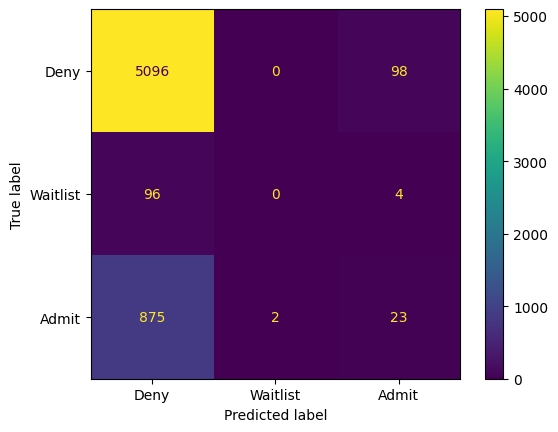

In [212]:
# Mostrar Matriz de confusão

confusion_matrix_modelo = confusion_matrix(y, y_pred, labels=lista_admissao)
disp = ConfusionMatrixDisplay(confusion_matrix_modelo, display_labels=lista_admissao)
disp.plot()

### Tuning de Hiperparâmetros

In [213]:
# Ajuste dos hiperparametros
# min_samples_leaf = Mínimo de instâncias requeridas para formar uma folha
# max_depth = prodfundidade máxima da árvore
import optuna

def decisiontree_optune(trial):
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)
    max_depth = trial.suggest_int('max_depth', 2, 20)

    dt_model.set_params(classifier__min_samples_leaf = min_samples_leaf)
    dt_model.set_params(classifier__max_depth = max_depth)
    

    scores = cross_val_score(dt_model, X, y, cv=cv_folds, scoring='accuracy')

    return scores.mean()

In [217]:
estudo_decisiontree = optuna.create_study(direction='maximize')
estudo_decisiontree.optimize(decisiontree_optune, n_trials=100)

[I 2024-10-19 12:28:59,422] A new study created in memory with name: no-name-05c4e563-0de6-448b-ac33-e5cf752c4683
[I 2024-10-19 12:28:59,578] Trial 0 finished with value: 0.8385534219711817 and parameters: {'min_samples_leaf': 45, 'max_depth': 9}. Best is trial 0 with value: 0.8385534219711817.
[I 2024-10-19 12:28:59,729] Trial 1 finished with value: 0.8385534219711817 and parameters: {'min_samples_leaf': 25, 'max_depth': 11}. Best is trial 0 with value: 0.8385534219711817.
[I 2024-10-19 12:28:59,904] Trial 2 finished with value: 0.8385534219711817 and parameters: {'min_samples_leaf': 29, 'max_depth': 19}. Best is trial 0 with value: 0.8385534219711817.
[I 2024-10-19 12:29:00,048] Trial 3 finished with value: 0.8385534219711817 and parameters: {'min_samples_leaf': 18, 'max_depth': 19}. Best is trial 0 with value: 0.8385534219711817.
[I 2024-10-19 12:29:00,164] Trial 4 finished with value: 0.8385534219711817 and parameters: {'min_samples_leaf': 24, 'max_depth': 5}. Best is trial 0 with 

In [219]:
# Melhor resultado e melhor conjunto de hiperparâmetros
    
print(f'Melhor acurácia:{estudo_decisiontree.best_value}')
print(f'Melhores parâmetros:{estudo_decisiontree.best_params}')

Melhor acurácia:0.8385534219711817
Melhores parâmetros:{'min_samples_leaf': 45, 'max_depth': 9}


### Visualização da árvore

In [236]:
X_train_tree = X.copy()
X_train_tree['sexo_label'] = X_train_tree.sexo.astype('category').cat.codes
X_train_tree['graduacao_label'] = X_train_tree.graduacao.astype('category').cat.codes
X_train_tree['raca_label'] = X_train_tree.raca.astype('category').cat.codes
X_train_tree['setorExperiencia_label'] = X_train_tree.setorExperiencia.astype('category').cat.codes
X_train_tree.drop(['sexo', 'graduacao', 'raca', 'setorExperiencia'], axis=1, inplace=True)
X_train_tree.rename(columns={'sexo_label': 'sexo', 'graduacao_label': 'graduacao', 'raca_label': 'raca', 'setorExperiencia_label': 'setorExperiencia'}, inplace=True)
X_train_tree


,international,mediaNotas,gmat,anosExperiencia,sexo,graduacao,raca,setorExperiencia
0,False,3.30,620.0,3.0,0,0,0,3
1,False,3.28,680.0,5.0,1,1,1,6
2,True,3.30,710.0,5.0,0,0,3,13
3,False,3.47,690.0,6.0,1,2,1,13
4,False,3.35,590.0,5.0,1,2,2,1
...,...,...,...,...,...,...,...,...
6189,False,3.49,640.0,5.0,1,0,4,9
6190,False,3.18,670.0,4.0,1,2,1,1
6191,True,3.22,680.0,5.0,0,0,3,4
6192,True,3.36,590.0,5.0,1,0,3,9


In [238]:
clf_decisionTree = DecisionTreeClassifier(min_samples_leaf=estudo_decisiontree.best_params['min_samples_leaf'],
                                          max_depth=estudo_decisiontree.best_params['max_depth'])

y_train_tree = y.copy()

clf_decisionTree.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=45)

In [243]:
# Visualização da arvore de decisão

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=1000)

plot_tree(clf_decisionTree, feature_names=X_train_tree.columns.to_numpy(),
          class_names=lista_admissao,
          filled=True)

[Text(0.3574719551282051, 0.95, 'gmat <= 655.0\ngini = 0.275\nsamples = 6194\nvalue = [900.0, 5194.0, 100.0]\nclass = Waitlist'),
 Text(0.1778846153846154, 0.85, 'sexo <= 0.5\ngini = 0.066\nsamples = 3339\nvalue = [85, 3225, 29]\nclass = Waitlist'),
 Text(0.26767828525641024, 0.8999999999999999, 'True  '),
 Text(0.16506410256410256, 0.75, 'raca <= 2.5\ngini = 0.17\nsamples = 1239\nvalue = [85, 1125, 29]\nclass = Waitlist'),
 Text(0.07692307692307693, 0.65, 'raca <= 0.5\ngini = 0.081\nsamples = 523\nvalue = [15, 501, 7]\nclass = Waitlist'),
 Text(0.05128205128205128, 0.55, 'anosExperiencia <= 5.5\ngini = 0.17\nsamples = 218\nvalue = [15, 198, 5]\nclass = Waitlist'),
 Text(0.038461538461538464, 0.45, 'setorExperiencia <= 9.5\ngini = 0.201\nsamples = 153\nvalue = [14.0, 136.0, 3.0]\nclass = Waitlist'),
 Text(0.02564102564102564, 0.35, 'setorExperiencia <= 2.5\ngini = 0.221\nsamples = 104\nvalue = [12, 91, 1]\nclass = Waitlist'),
 Text(0.01282051282051282, 0.25, 'gini = 0.15\nsamples = 49\